# <span style="color:red">VBMicrolensing</span>

# Head

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import VBMicrolensing

mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

# Initialize

In [4]:
# Initialize VBMicrolensing() class object
VBM = VBMicrolensing.VBMicrolensing()
#Set relative accuracy
VBM.RelTol = 1e-03
#Set accuracy
VBM.Tol=1e-03

# System Configuration

In [5]:
t0 = 0.
tE=1.2
rho=0.5

#im position of first lens
s1_im=0.

#Lens parameters excluding the first one, 
#in order consist of real position, imaginary position, and mass ratio
sq_n=((-1.2,0.5,0.5),(-1,0.4,1.1e-1),(0.6,0,1.1e-2))


# Light Curve

In [6]:
num_points = 1000
tmin = -5
tmax = 5
t = np.linspace(t0 + tmin, t0 + tmax, num_points)

params = [t0, np.log(tE), np.log(rho), s1_im]

for values in sq_n:
    params.extend(values)

In [7]:
# Set the Method that you want use : Singlepoly, Multipoly, Nopoly.
VBM.SetMethod(VBM.Method.Nopoly)

In [8]:
mag=VBM.LightCurve(params,t)

# Critical curves and the caustic curves

In [9]:
# Calculate the cirtical curves and the caustic curves
caustics = VBM.Caustics()
criticalcurves=VBM.CriticalCurves()

# Plot

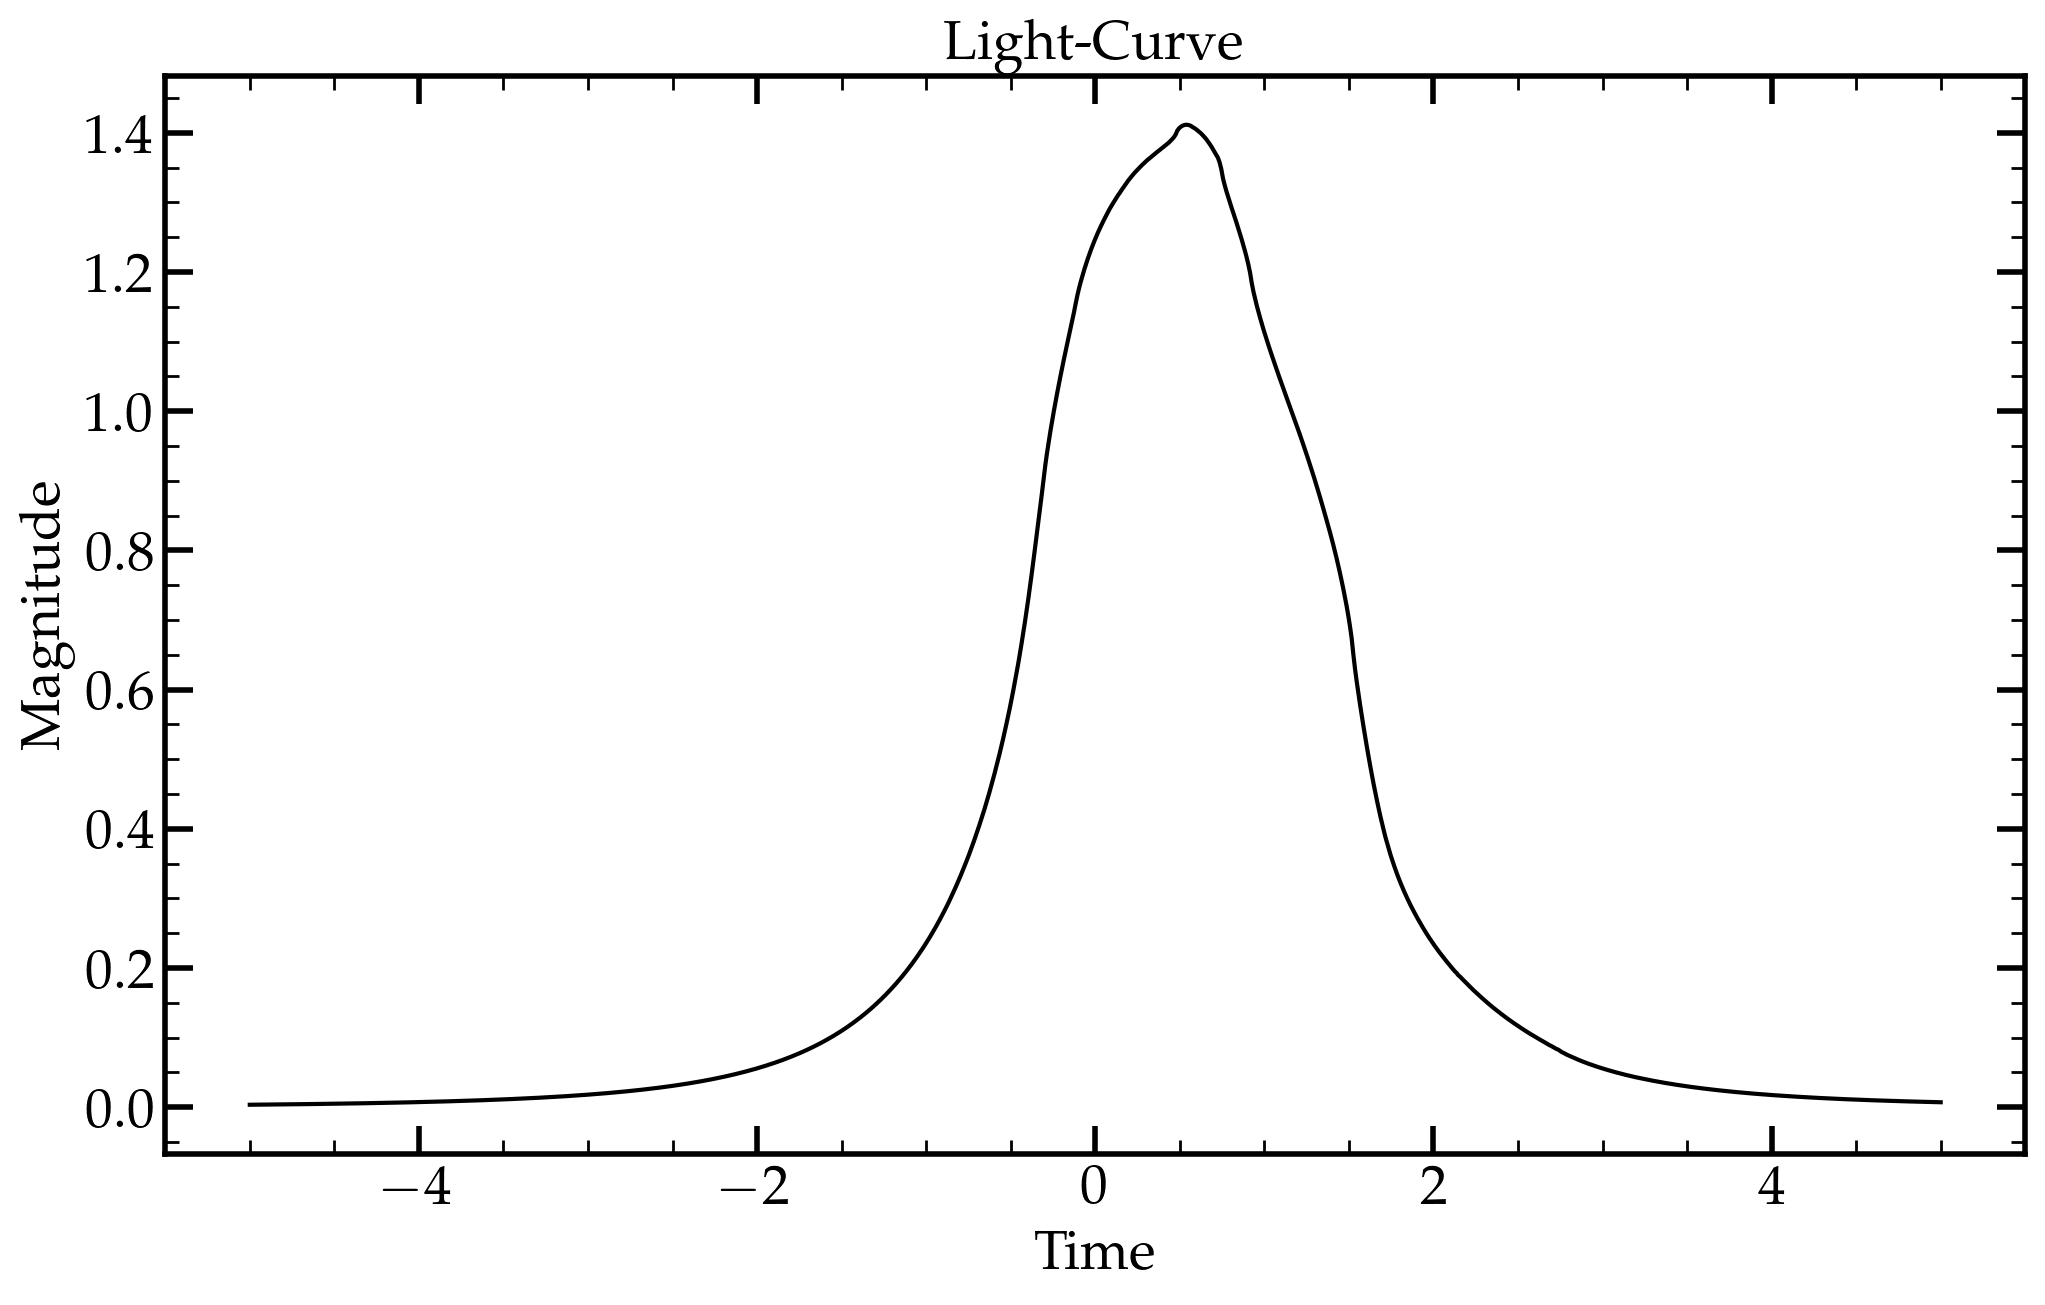

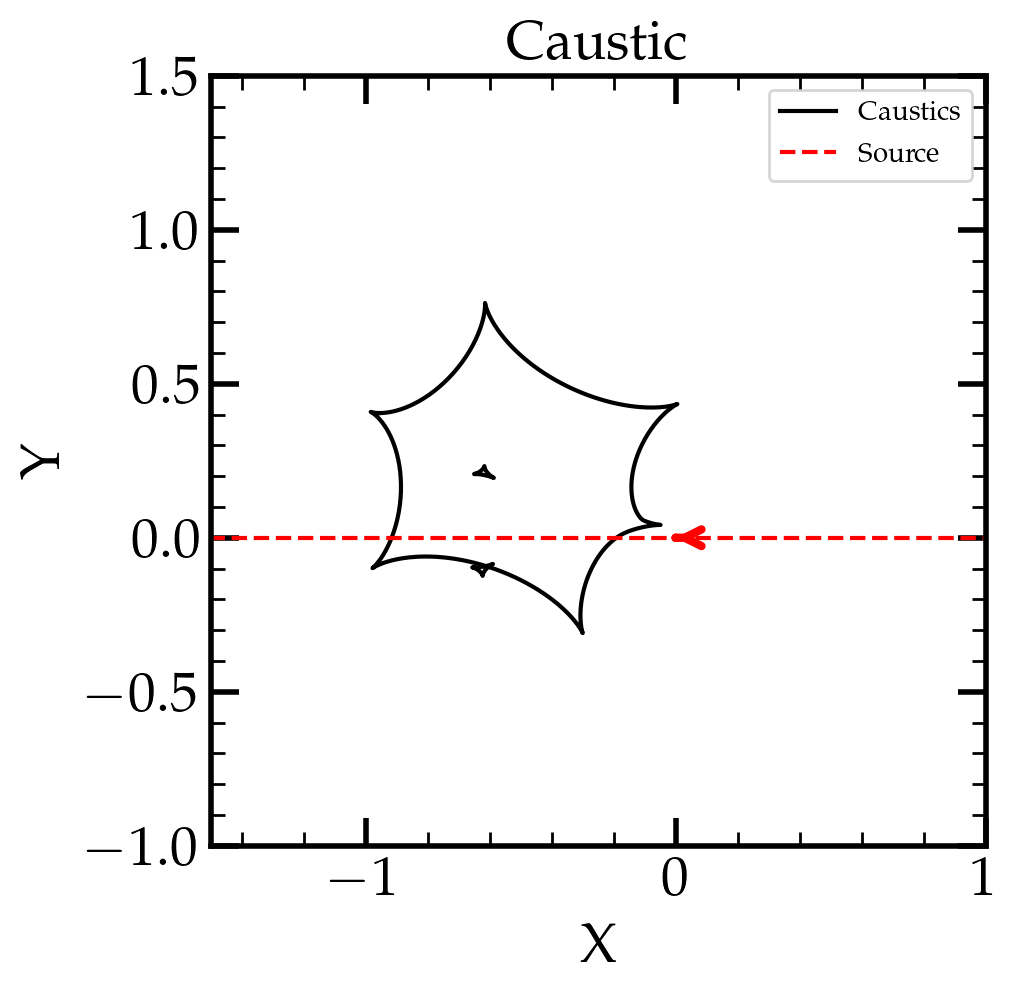

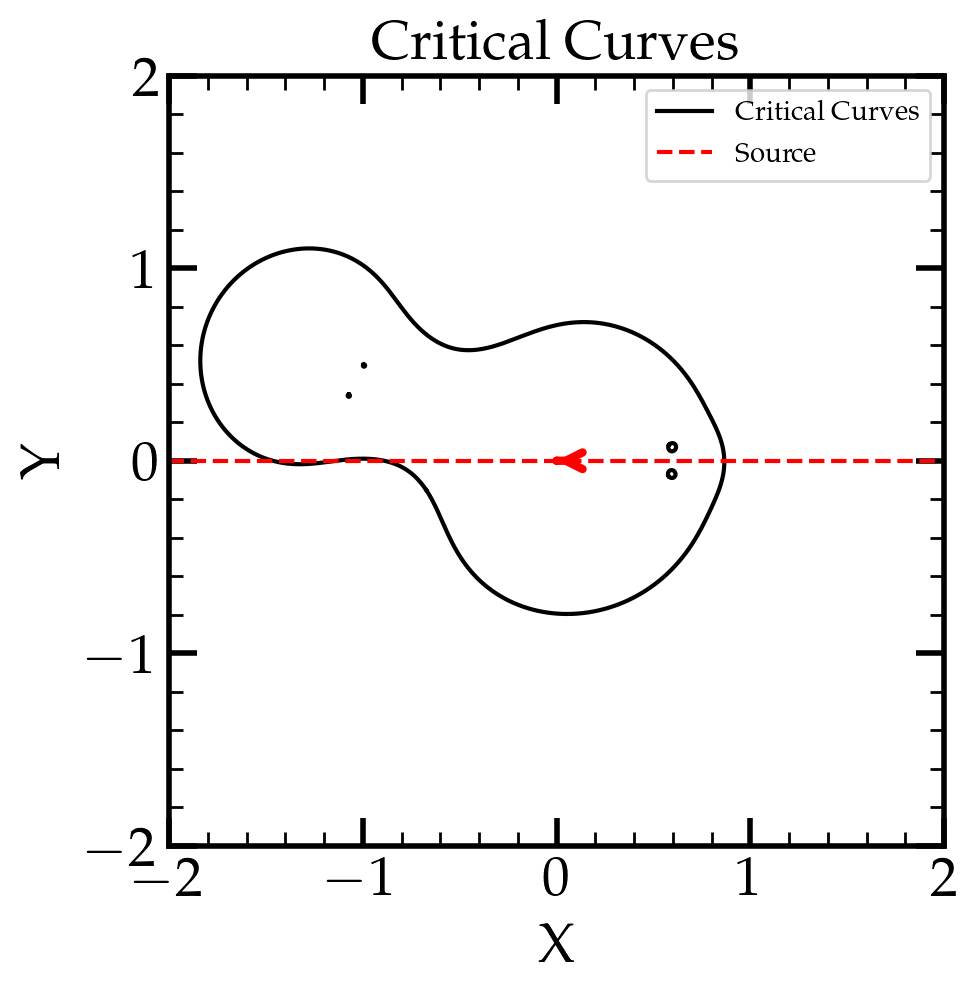

In [10]:
# LIGHT CURVE plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(t, 2.5*np.log10(mag[0]), 'k-')
ax.set_title('Light-Curve')
ax.set_xlabel('Time')
ax.set_ylabel('Magnitude')
ax.minorticks_on()  # Aggiungi tick minori

ax.tick_params(axis='both', which='major', width=2, length=10, direction='in', bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='both', which='minor', width=1, length=5, direction='in', bottom=True, top=True, left=True, right=True)

for spine in ax.spines.values():
    spine.set_linewidth(2)

# CAUSTICS plot
fig2 = plt.figure(figsize=(5, 5))
ax2 = fig2.add_subplot(111)

first_plot = True
for cau in caustics:
    if first_plot:
        ax2.plot(cau[0], cau[1], 'k-', markersize=0.1, label='Caustics')
        first_plot = False
    else:
        ax2.plot(cau[0], cau[1], 'k-', markersize=0.1)
        
ax2.plot(mag[1], mag[2], 'r--', label='Source')

mid_x = np.mean(mag[1])
mid_y = np.mean(mag[2])
delta_x = mag[1][-1] - mag[1][0]
delta_y = mag[2][-1] - mag[2][0]
arrow_end_x = mid_x + delta_x * 0.0001
arrow_end_y = mid_y + delta_y * 0.0001
ax2.annotate('', xy=(arrow_end_x, arrow_end_y), xytext=(mid_x, mid_y),
             arrowprops=dict(arrowstyle='->', color='red', mutation_scale=15, linestyle='-', linewidth=3))

ax2.set_xlim(-1.5, 1)
ax2.set_ylim(-1, 1.5)
ax2.set_title('Caustic')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.minorticks_on()  
ax2.legend()

ax2.tick_params(axis='both', which='major', width=2, length=10, direction='in', bottom=True, top=True, left=True, right=True)
ax2.tick_params(axis='both', which='minor', width=1, length=5, direction='in', bottom=True, top=True, left=True, right=True)

for spine in ax2.spines.values():
    spine.set_linewidth(2)

# CRITICAL CURVE plot
fig3 = plt.figure(figsize=(5, 5))
ax3 = fig3.add_subplot(111)

first_plot = True
for cri in criticalcurves:
    if first_plot:
        ax3.plot(cri[0], cri[1], 'k-', markersize=0.1, label='Critical Curves')
        first_plot = False
    else:
        ax3.plot(cri[0], cri[1], 'k-', markersize=0.1)
        
ax3.plot(mag[1], mag[2], 'r--', label='Source')

ax3.annotate('', xy=(arrow_end_x, arrow_end_y), xytext=(mid_x, mid_y),
             arrowprops=dict(arrowstyle='->', color='red', mutation_scale=15, linestyle='-', linewidth=3))

ax3.set_xlim(-2, 2)
ax3.set_ylim(-2, 2)
ax3.set_title('Critical Curves')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.minorticks_on()

ax3.legend()

ax3.tick_params(axis='both', which='major', width=2, length=10, direction='in', bottom=True, top=True, left=True, right=True)
ax3.tick_params(axis='both', which='minor', width=1, length=5, direction='in', bottom=True, top=True, left=True, right=True)

for spine in ax3.spines.values():
    spine.set_linewidth(2)

plt.show()